## Autoregressive (AR) Models

### Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the `arima_process` module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with ϕ=0.9, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

- Import the class ArmaProcess in the arima_process module.
- Plot the simulated AR procesees:
- Let ar1 represent an array of the AR parameters [1, −ϕ − ϕ ] as explained above. For now, the MA parmater array, ma1, will contain just the lag-zero coefficient of one.
- With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
- Simulate 1000 data points from the object you just created, AR_object1, using the method  `.generate_sample()`. Plot the simulated data in a subplot.
- Repeat for the other AR parameter.

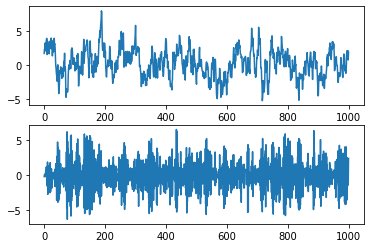

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

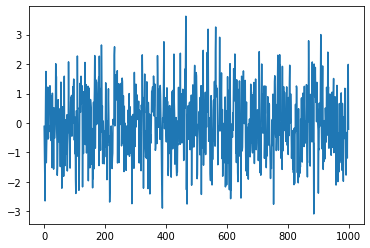

In [12]:
# Plot 3: AR parameter = +0.3
plt.subplot(1,1,1)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show();

### Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2=0.81, the third-lag will be (0.9)^3=0.729, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)^2=0.81, the third-lag will be (−0.9)^3=−0.729, etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and supress the confidence intervals by setting alpha=1).

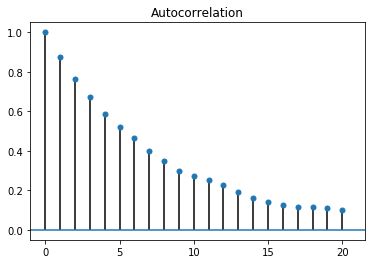

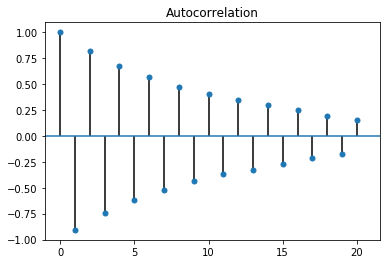

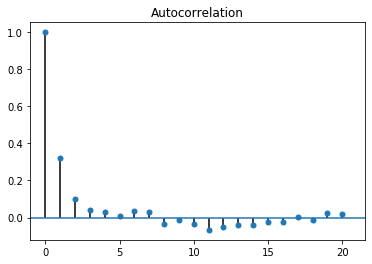

In [13]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Estimating an AR Model¶
You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true ϕ of 0.9, you will print out the estimate of ϕ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).
- Fit the model mod using the method .fit() and save it in a results object called res.
- Print out the entire summmary of results using the .summary() method.
- Just print out an estimate of the constant and ϕ using the .params attribute (no parentheses).

In [14]:
 # Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1397.504
Method:                       css-mle   S.D. of innovations              0.978
Date:                Mon, 30 Mar 2020   AIC                           2801.009
Time:                        18:23:40   BIC                           2815.732
Sample:                             0   HQIC                          2806.605
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2346      0.244      0.963      0.336      -0.243       0.712
ar.L1.y        0.8739      0.015     57.105      0.000       0.844       0.904
                                    Roots           

In [15]:
# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

When the true phi=0.9, the estimate of phi (and the constant) are:
[0.2346446 0.8739238]


### Forecasting with an AR Model
In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the `predict()` method if you want the forecasts in the form of a series of data, or using the `plot_predict()` method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with ϕ=0.9, you will plot in-sample and out-of-sample forecasts.

- Import the class ARMA in the module statsmodels.tsa.arima_model
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)
- Fit the model mod using the method `.fit()` and save it in a results object called res
- Plot the in-sample and out-of-sample forecasts of the data using the `plot_predict()` method
- Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

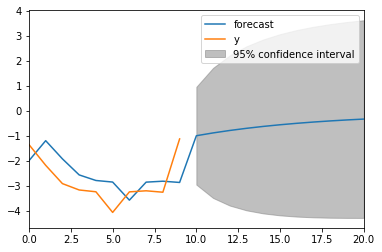

In [6]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

* 
Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

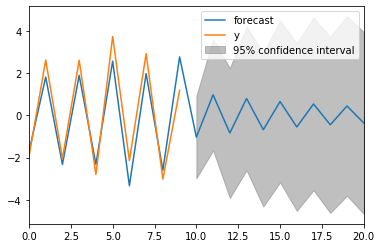

In [7]:
# Forecast the first AR(2) model
mod = ARMA(simulated_data_2, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

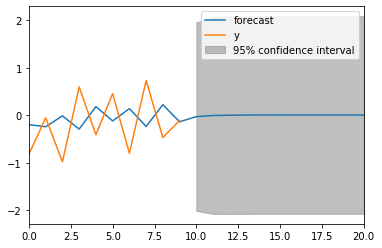

In [8]:
# Forecast the first AR(3) model
mod = ARMA(simulated_data_3, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
- Fit the model mod using the method .fit() and save it in a results object called res.
- Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
- Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.

In [9]:
interest_rate_data = pd.read_csv("Data/interest_rate_data.csv", parse_dates=True, index_col="DATE")
interest_rate_data.head()

,Unnamed: 1
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


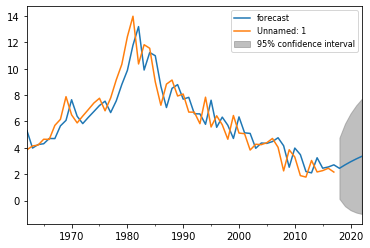

In [10]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

* According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

### Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.
You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

- Import plot_acf function from the statsmodels module
- Create two axes for the two subplots
- Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
- Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

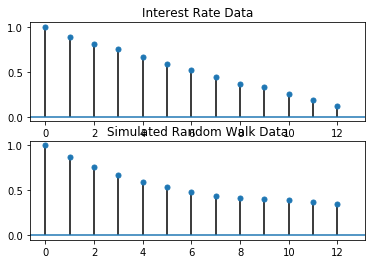

In [11]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data_1, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()


* Notice the Autocorrelation functions look very similar for the two series.

### Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.
Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

- Import the modules for simulating data and for plotting the PACF
- Simulate an AR(1) with ϕ=0.6 (remember that the sign for the AR parameter is reversed)
- Plot the PACF for simulated_data_1 using the plot_pacf function
- Simulate an AR(2) with ϕ1=0.6,ϕ2=0.3 (again, reverse the signs)
- Plot the PACF for simulated_data_2 using the plot_pacf function

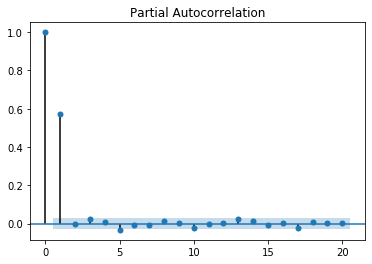

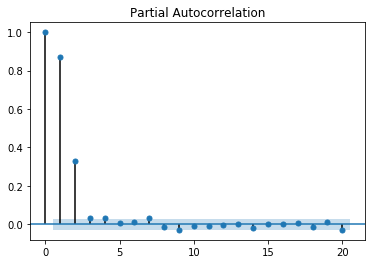

In [12]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()


* Notice that the number of significant lags for the PACF indicate the order of the AR model.

### Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

- Import the ARMA module for estimating the parameters and computing BIC.
- Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
- Loop through order p for p = 0,...,6.
- For each p, fit the data to an AR model of order p.
- For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
- Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,...6).

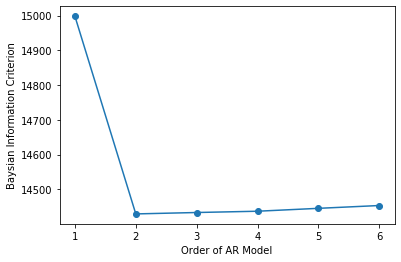

In [13]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()


* For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

### Moving Average (MA) and ARMA Models

#### Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])

- Import the class ArmaProcess in the arima_process module.
- Plot the simulated MA(1) processes
- Let ma1 represent an array of the AR parameters [1, θ] as explained above. The AR parmater array will contain just the lag-zero coeffienct of one.
- With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
- Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). Plot the simulated data in a subplot.
- Repeat for the other MA parameter.

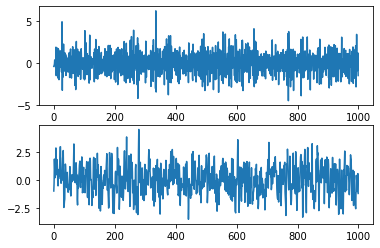

In [14]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

* The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

### Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

- simulated_data_1 is the simulated time series with an MA parameter of θ=−0.9, simulated_data_2 is for an MA paramter of θ=+0.9, and simulated_data_3 is for an MA parameter of θ=−0.3
- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags.

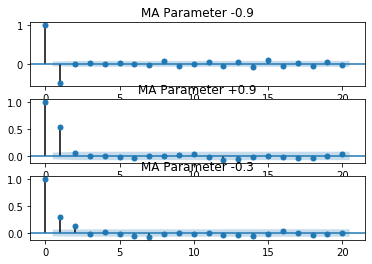

In [15]:
# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter +0.3")
plt.show()

### Estimating an MA Model

You will estimate the MA(1) parameter, θ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true θ of -0.9, you will print out the estimate of θ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1).
- Fit the model mod using the method `.fit()` and save it in a results object called res.
- Print out the entire summmary of results using the `.summary()` method.
- Just print out an estimate of the constant and phi parameter using the .params attribute (no arguments).

In [16]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the consant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1445.973
Method:                       css-mle   S.D. of innovations              1.027
Date:                Tue, 10 Mar 2020   AIC                           2897.945
Time:                        07:35:01   BIC                           2912.669
Sample:                             0   HQIC                          2903.541
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.004      0.430      0.667      -0.006       0.010
ma.L1.y       -0.8743      0.017    -50.128      0.000      -0.908      -0.840
                                    Roots           

* Notice how close the estimated parameter is to the true parameter.

### Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

- Import the class ARMA in the module statsmodels.tsa.arima_model
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the (p,q) order of the model (in this case, for an MA(1), order=(0,1)
- Fit the model mod using the method `.fit()` and save it in a results object called res
- Plot the in-sample and out-of-sample forecasts of the data using the `.plot_predict()` method
- Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

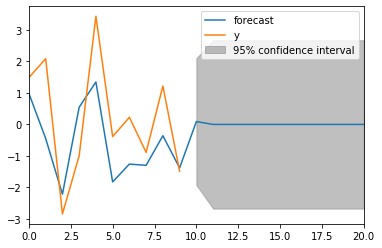

In [17]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

* Notice that the out-of-sample forecasts are flat into the future after the first data point.

### High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows, you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

- Manually change the first date to zero using `.iloc[0,0]`.
- Change the two column headers to 'DATE' and 'CLOSE' by setting intraday.columns equal to a list containing those two strings.
- Use the pandas attribute .dtypes (no parentheses) to see what type of data are in each column.
- Convert the DATE column to numeric using the pandas function `to_numeric()`.
- Make the DATE column the new index by using the pandas method `set_index()` which will take the DATE column as its argument.


In [18]:
intraday = pd.read_csv("Data/intraday.csv")
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [19]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

DATE      object
CLOSE    float64
dtype: object


In [20]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


In [21]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 390
Data columns (total 1 columns):
CLOSE    389 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


#### More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. You can fill in the missing rows with the .reindex() method, convert the index to time of day, and then plot the data.
Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

- Print out the length of intraday using `len()`.
- Find the missing rows by making range(391) into a set and subtracting the set of the intraday index, intraday.index.
- Fill in the missing rows using the `.reindex()` method, setting the index equal to the full range(391) and forward filling the missing data by passing the argument method='ffill'.
- Change the index to times using pandas function `date_range()`, starting with '2017-08-28 9:30' and ending with '2017-08-28 16:00' and passing the argument freq='1min'.
- Plot the data and include gridlines.

In [22]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

The length of the DataFrame is:  389
Missing rows:  {182, 14}


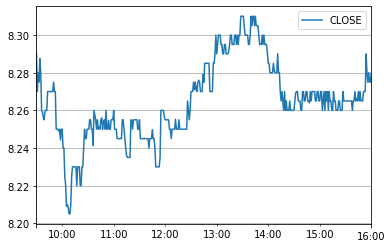

In [23]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

#### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

- Import plot_acf and ARMA modules from statsmodels
- Compute minute-to-minute returns from prices:
    - Compute returns with the `.pct_change()` method
    - Use the pandas method `.dropna()` to drop the first row of returns, which is NaN
- Plot the ACF function with lags up to 60 minutes
- Fit the returns data to an MA(1) model and print out the MA(1) parameter

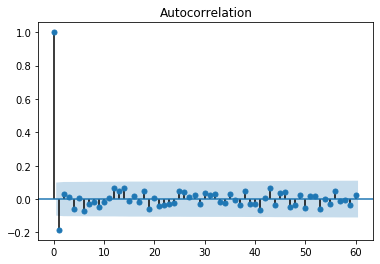

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [24]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

* Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

#### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.82,0.83,… for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

Note, to raise a number x to the power of an exponent n, use the format x**n.

- Import the modules for simulating data and plotting the ACF from statsmodels
- Use a list comprehension to build a list with exponentially decaying MA parameters: 1,0.8,0.82,0.83,…,
- Simulate 5000 observations of the MA(30) model
- Plot the ACF of the simulated series

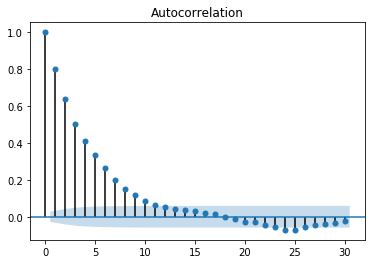

In [25]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

* Notice that the ACF looks the same as an AR(1) with parameter 0.8.

### Cointegration Models

#### A Dog on a Leash? (Part 1)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in Dollar/gallon, by 7.25, which converts it to Dollar/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from Quandl.

- Plot Heating Oil, HO, and Natural Gas, NG, on the same subplot
- Make sure you multiply the HO price by 7.25 to match the units of NG
- Plot the spread on a second subplot
- The spread will be 7.25*HO - NG

In [35]:
HO = pd.read_csv("Data/HO.csv", index_col=0)
print(HO.info())
HO.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3754 entries, 1991-01-02 to 2005-12-30
Data columns (total 1 columns):
Close    3754 non-null float64
dtypes: float64(1)
memory usage: 58.7+ KB
None


,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024
1991-01-04,0.6830
1991-01-07,0.7617
1991-01-08,0.7430


In [36]:
NG = pd.read_csv("Data/NG.csv",  index_col=0)
print(NG.info())
NG.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3754 entries, 1991-01-02 to 2005-12-30
Data columns (total 1 columns):
Close    3754 non-null float64
dtypes: float64(1)
memory usage: 58.7+ KB
None


,Close
Date,
1991-01-02,1.832
1991-01-03,1.782
1991-01-04,1.743
1991-01-07,1.785
1991-01-08,1.786


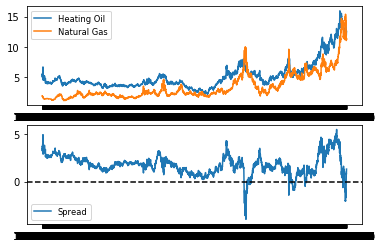

In [34]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

* Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.

### A Dog on a Leash? (Part 2)

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. 

- Perform the adfuller test on HO and on NG separately, and save the results (results are a list)
- The argument for adfuller must be a series, so you need to include the column 'Close'
- Print just the p-value (item [1] in the list)
- Do the same thing for the spread, again converting the units of HO

In [39]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])

result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

The p-value for the ADF test on HO is  0.9567108785017862
The p-value for the ADF test on NG is  0.9008747444676728


In [40]:
# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on the spread is  7.019439302142287e-05


* As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.

### Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,−1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient b, then the cointegration vector is simply (1,−b). Then perform the ADF test on BTC −b ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

- Import the statsmodels module for regression and the adfuller function
- Add a constant to the ETH DataFrame using `sm.add_constant()`
- Fit the regression using `sm.OLS(y,x).fit()` and save the results in result. The intercept is in `result.params[0]` and the slope in `result.params[1]`
- Run ADF test on BTC −b

In [49]:
BTC = pd.read_csv("Data/BTC.csv", index_col=0)
print(BTC.info())
BTC.head()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 2015-09-29 to 2017-09-29
Data columns (total 1 columns):
Price    732 non-null float64
dtypes: float64(1)
memory usage: 11.4+ KB
None


,Price
Date,
2015-09-29,236.9
2015-09-30,237.1
2015-10-01,238.3
2015-10-02,238.3
2015-10-03,239.9


In [50]:
ETH = pd.read_csv("Data/ETH.csv", index_col=0)
print(ETH.info())
ETH.head()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 2015-09-29 to 2017-09-29
Data columns (total 1 columns):
Price    732 non-null float64
dtypes: float64(1)
memory usage: 11.4+ KB
None


,Price
Date,
2015-09-29,0.68
2015-09-30,0.71
2015-10-01,0.65
2015-10-02,0.66
2015-10-03,0.68


In [51]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
ETH.head()

C:\Anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price
Date,,
2015-09-29,1.0,0.68
2015-09-30,1.0,0.71
2015-10-01,1.0,0.65
2015-10-02,1.0,0.66
2015-10-03,1.0,0.68


In [105]:
result = sm.OLS(BTC,ETH).fit()

In [106]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     6725.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:21:17   Log-Likelihood:                -5293.4
No. Observations:                 732   AIC:                         1.059e+04
Df Residuals:                     730   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        528.7013     14.366     36.802      0.000     500.498     556.905
Price          9.8009      0.120     82.004      0.000       9.566      10.036
==============================================================================
Omnibus:                      159.020   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.455
Skew:                          -0.890   Prob(JB):                    2.76e-171
Kurtosis:                       7.752   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Compute ADF
b = result.params[1]
b

9.800923246471697

In [110]:
# Compute ADF
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
adf_stats

(-3.145426772889841,
 0.023369002323472794,
 20,
 711,
 {'1%': -3.439580754053961,
  '5%': -2.865613606467485,
  '10%': -2.568939269723711},
 8107.359441380021)

In [103]:
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.023369002323472794


* The data suggests that Bitcoin and Ethereum are cointegrated

### Case Study: Climate Change

#### Is Temperature a Random Walk (with Drift)?¶

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016. Plot the data and test whether it follows a random walk (with drift).

- Convert the index of years into a datetime object using `pd.to_datetime()`, and since the data is annual, pass the argument format='%Y'.
- Plot the data using `.plot()`
* Compute the p-value the Augmented Dickey Fuller test using the adfuller function.
- Save the results of the ADF test in result, and print out the p-value in result[1].

In [116]:
temp_NY = pd.read_csv("Data/temp_NY", index_col=0)
print(temp_NY.info())
temp_NY.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1870 to 2016
Data columns (total 1 columns):
TAVG    147 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB
None


,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


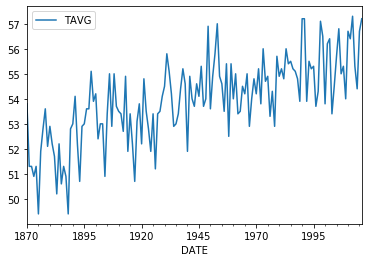

In [117]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

In [118]:
# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.5832938987871106


* The data seems to follow a random walk with drift.

### Getting "Warmed" Up: Look at Autocorrelations

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

- Import the modules for plotting the sample ACF and PACF
- Take first differences of the DataFrame temp_NY using the pandas method `.diff()`
- Create two subplots for plotting the ACF and PACF
- Plot the sample ACF of the differenced series
- Plot the sample PACF of the differenced series

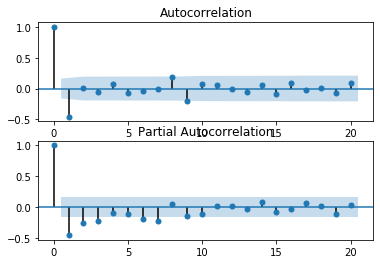

In [121]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

- There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

### Which ARMA Model is Best?

Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.

- For each ARMA model, create an instance of the ARMA class called mod using the argument order=(p,q)
- Fit the model mod using the method fit() and save it in a results object called res
- Print the AIC value, found in res.aic

In [128]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.9274123160227
The AIC for an MA(1) is:  469.3909741274666


* The ARMA(1,1) has the lowest AIC values among the three models.

### Don't Throw Out That Winter Coat Yet

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.
Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. You will use the ARIMA module on the temperature data, pre-loaded in the DataFrame temp_NY, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature.
The data is in a DataFrame called temp_NY.

- Create an instance of the ARIMA class called mod for an integrated ARMA(1,1) model
- The d in order(p,d,q) is one, since we first differenced once
- Fit mod using the `.fit()` method and call the results res
- Forecast the series using the `plot_predict()` method on res
- Choose the start date as 1872-01-01 and the end date as 2046-01-01

C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


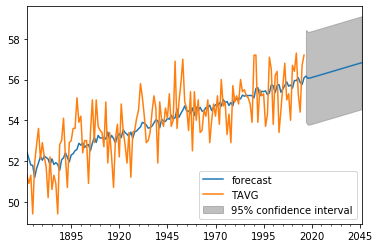

In [130]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

* According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.